In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
from sklearn.model_selection import train_test_split

In [102]:
data_path = "train_values.csv"
labels_path = "train_labels.csv"

In [135]:
# Đọc dữ liệu từ tệp CSV vào DataFrame
data = pd.read_csv(data_path)
label = pd.read_csv(labels_path)

In [136]:
train = pd.merge(data,label[['building_id', 'damage_grade']],on='building_id', how='left')
train.describe

<bound method NDFrame.describe of         building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                         2   30         

In [137]:
#chuẩn hóa dữ liệu 
drop_col = ['land_surface_condition',"foundation_type","roof_type","ground_floor_type","other_floor_type","position","plan_configuration",'legal_ownership_status']
X =data.drop(columns=drop_col, axis=1)
feature_names = X.columns

X1 = train.drop(columns=drop_col, axis=1)
print(X1)



        building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                         2   30                6                  5   
1  

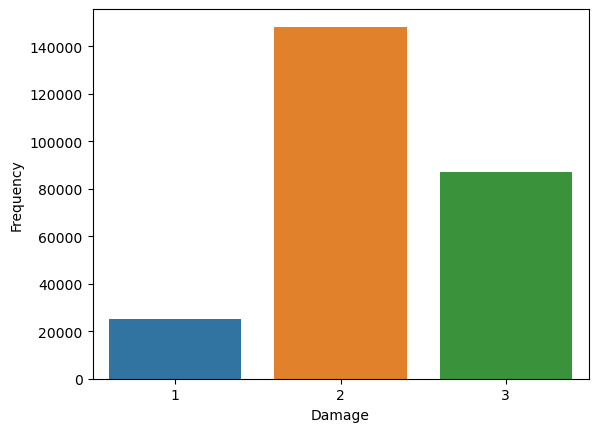

In [106]:
# Vẽ biểu đồ tần suất
sns.countplot(x='damage_grade', data=train)

# Đặt tên cho trục x và y
plt.xlabel('Damage')
plt.ylabel('Frequency')
# Hiển thị biểu đồ
plt.show()

## PCA ##


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


Text(0.5, 1.0, 'Correlation matrix')

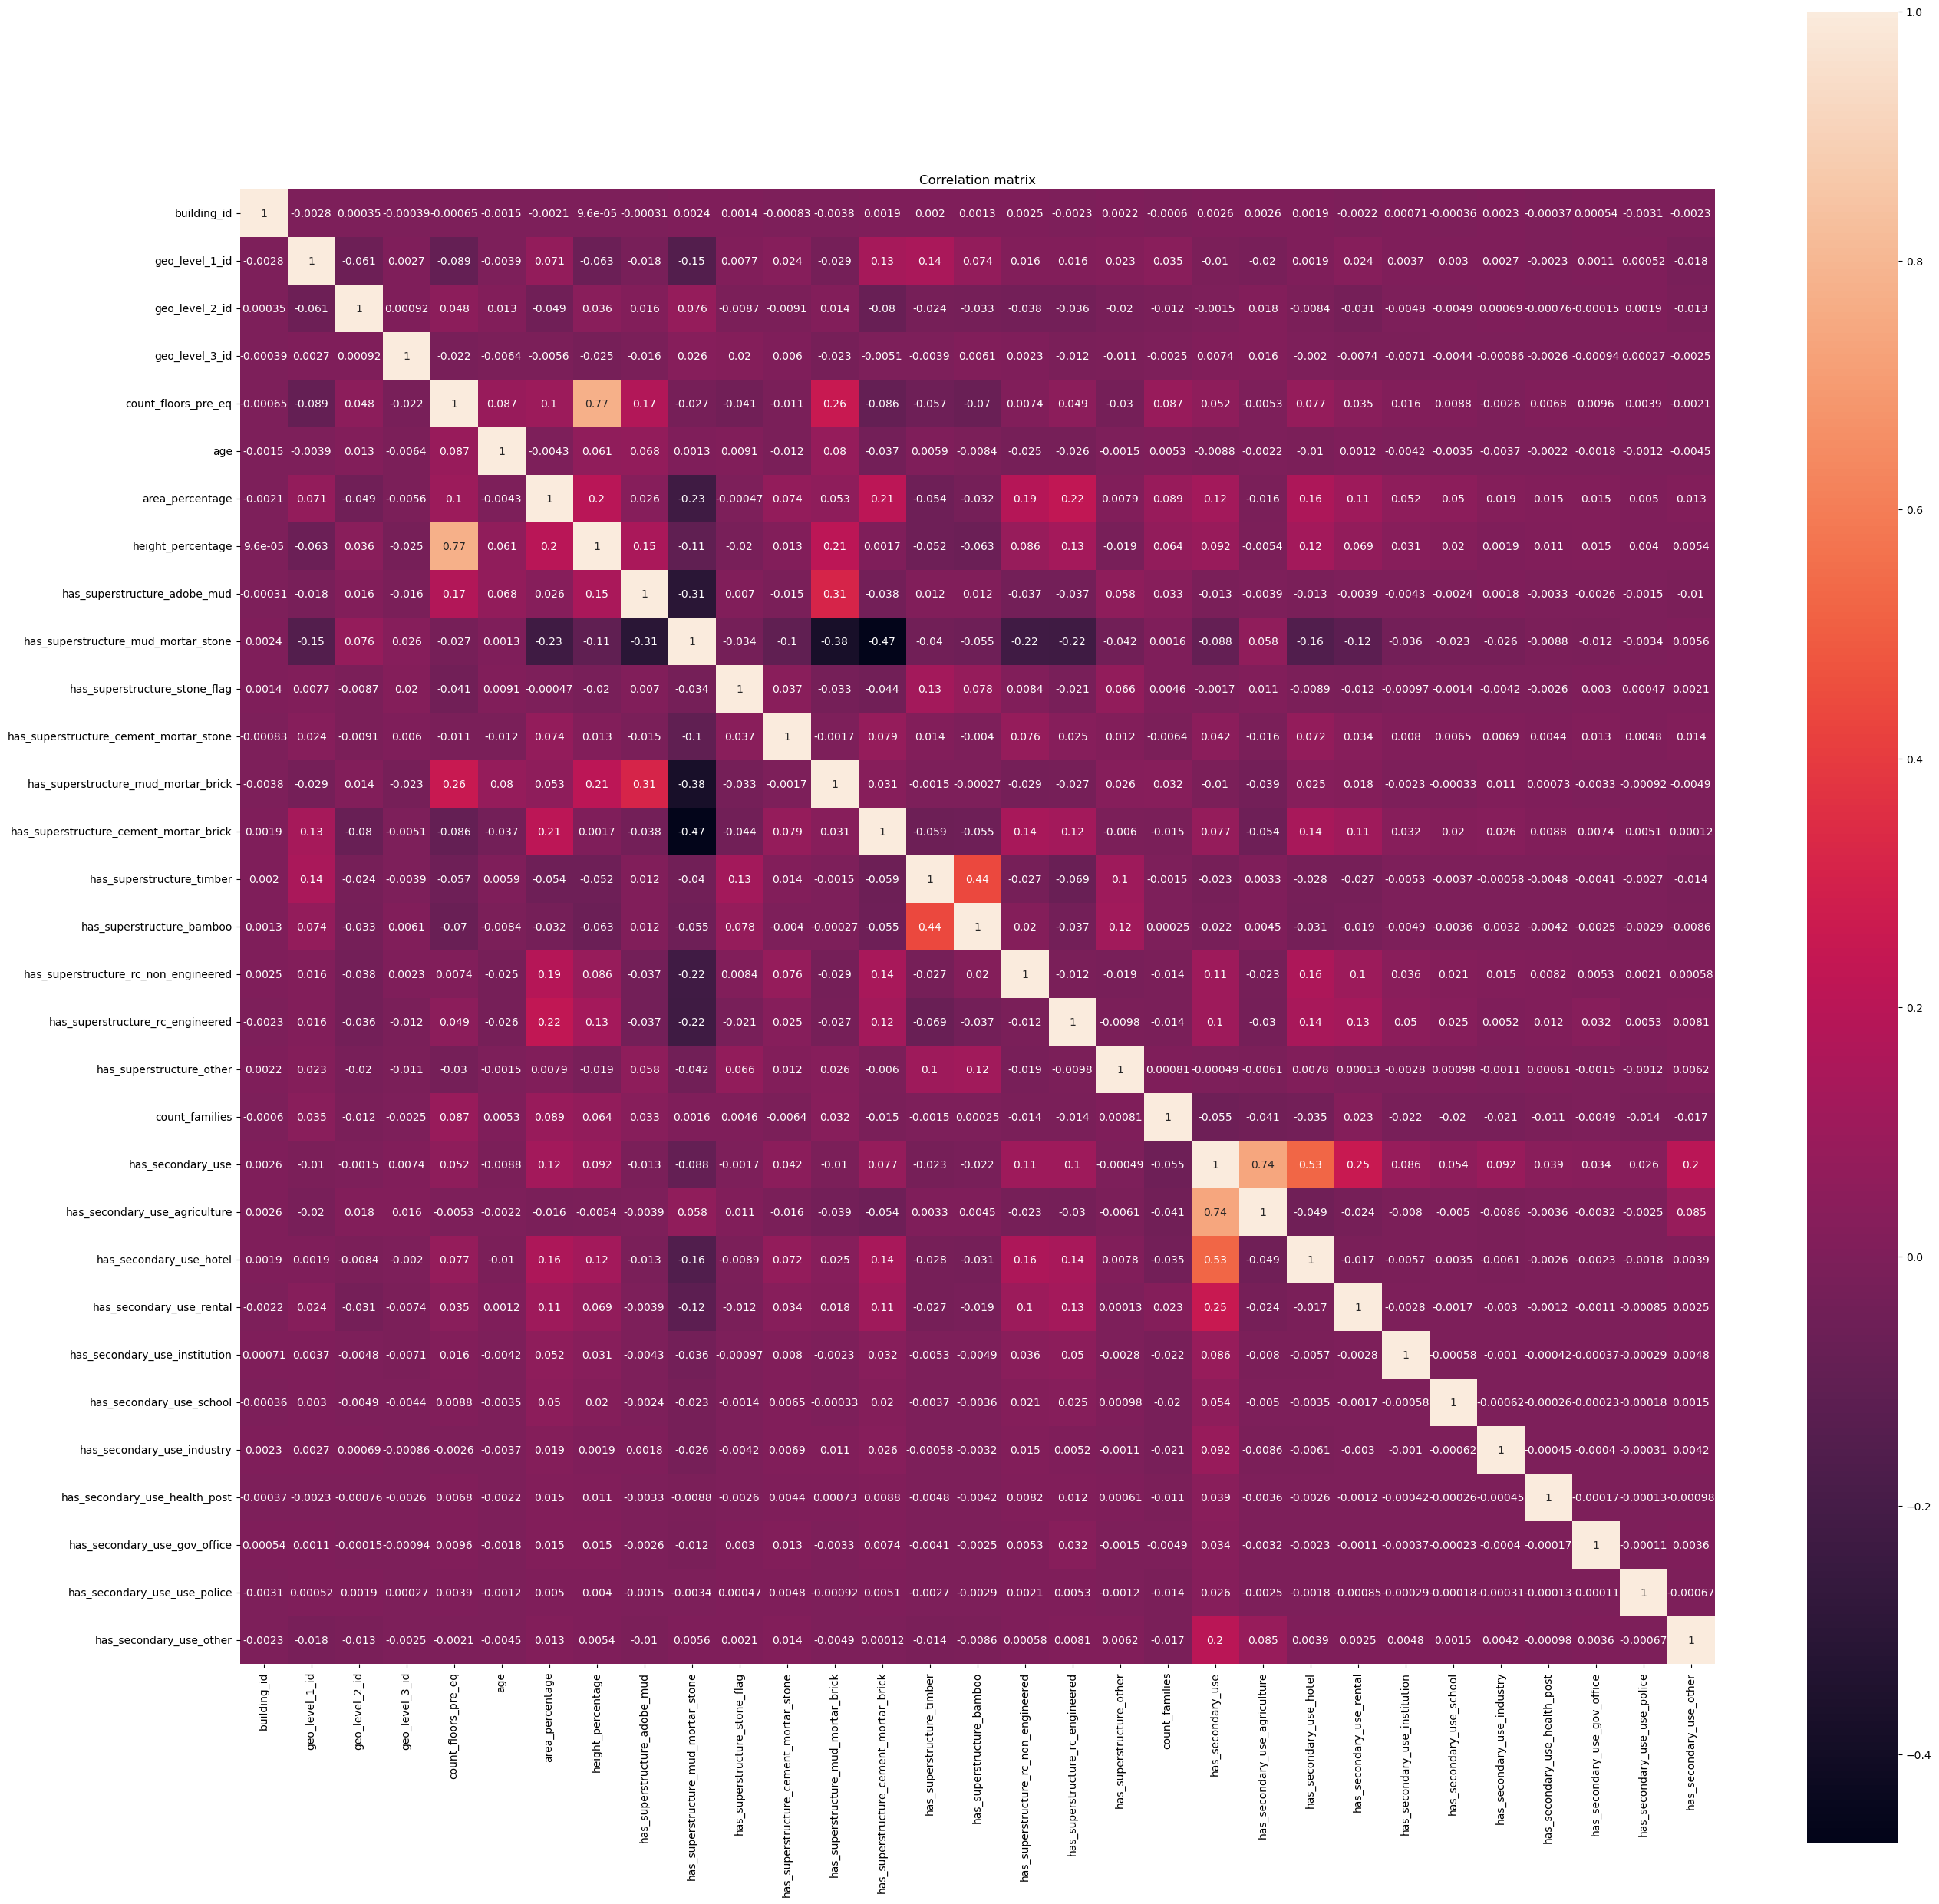

In [107]:
# X = (X - X.mean()) / X.std(ddof=0)

print(type(X), type(X.mean()))

# Calculating the correlation matrix of the data
# X_corr = (1 / 150) * X.T.dot(X)
X_corr = X.corr()
# Plotting the correlation matrix
plt.figure(figsize=(31,31))
sns.heatmap(X_corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')


In [108]:
from sklearn.decomposition import PCA
import numpy as np

# Assuming X is your data and feature_names is a list of feature names
# If you don't have feature names, you can create them based on your understanding of the data
# For example: feature_names = ["Feature1", "Feature2", ...]


pca = PCA(n_components=31)
pca.fit(X)

# Variance explained by each component
variance_explained = pca.explained_variance_ratio_

# Create labels for the variances based on feature names or other descriptors
labels = [f"Variance explained by {feature_names[i]}" for i in range(len(variance_explained))]

# Print or use labels as needed
for label, variance in zip(labels, variance_explained):
    print(label, ": ", variance)


Variance explained by building_id :  0.9998547684676777
Variance explained by geo_level_1_id :  0.00014333600879001492
Variance explained by geo_level_2_id :  1.836234331836882e-06
Variance explained by geo_level_3_id :  5.8330966364574446e-08
Variance explained by count_floors_pre_eq :  6.947714618979156e-10
Variance explained by age :  2.0843897032525527e-10
Variance explained by area_percentage :  4.077026441272557e-11
Variance explained by height_percentage :  2.3675390143206573e-12
Variance explained by has_superstructure_adobe_mud :  2.2080753712680916e-12
Variance explained by has_superstructure_mud_mortar_stone :  2.1059586145317212e-12
Variance explained by has_superstructure_stone_flag :  1.82986316891377e-12
Variance explained by has_superstructure_cement_mortar_stone :  1.5163727662886602e-12
Variance explained by has_superstructure_mud_mortar_brick :  8.534233346660351e-13
Variance explained by has_superstructure_cement_mortar_brick :  6.130129128860404e-13
Variance explai

In [109]:
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors
# method2
np.linalg.eig(X_corr)

(array([2.52688346, 1.97218645, 0.00603613, 1.83702738, 0.21170189,
        1.59583509, 0.31893691, 0.54446739, 1.27915488, 0.65595989,
        0.68538698, 0.77219992, 0.81851609, 1.09347439, 0.88476627,
        0.91845723, 0.9258359 , 1.04726551, 0.95199952, 1.02308035,
        0.96879388, 0.97603806, 0.98622181, 0.99014175, 0.99663863,
        0.997179  , 1.00553235, 1.00531234, 1.00308112, 1.00118827,
        1.00070118]),
 array([[-1.03288277e-03,  4.06389249e-03, -1.34042447e-04,
          2.66040757e-03,  5.05831583e-04,  4.14751762e-03,
          2.09428705e-03,  1.70063585e-03, -6.07936294e-03,
         -8.86034129e-03, -4.87116200e-03, -1.15110003e-02,
         -6.43391842e-03, -4.08871852e-02,  8.69666879e-03,
         -4.40417313e-03,  1.27420246e-03,  9.93676759e-03,
         -8.23845260e-02, -6.46463025e-02, -4.36487784e-03,
          3.80645739e-02,  5.88795250e-03,  1.38885994e-01,
          7.11413248e-01, -1.15343101e-01,  3.93575850e-01,
          3.82949034e-01, -3.7

Text(0.5, 0, 'Dimensions')

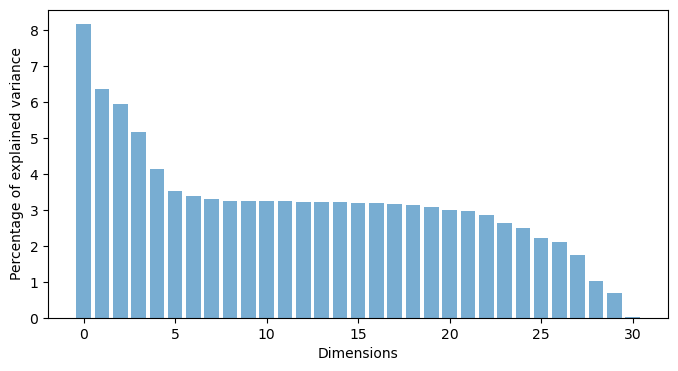

In [110]:
# plotting the variance explained by each PC
explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(31), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')



In [111]:
# calculating our new axis
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])
pc3 = X.dot(eig_vectors[:,2])


<Figure size 640x480 with 0 Axes>

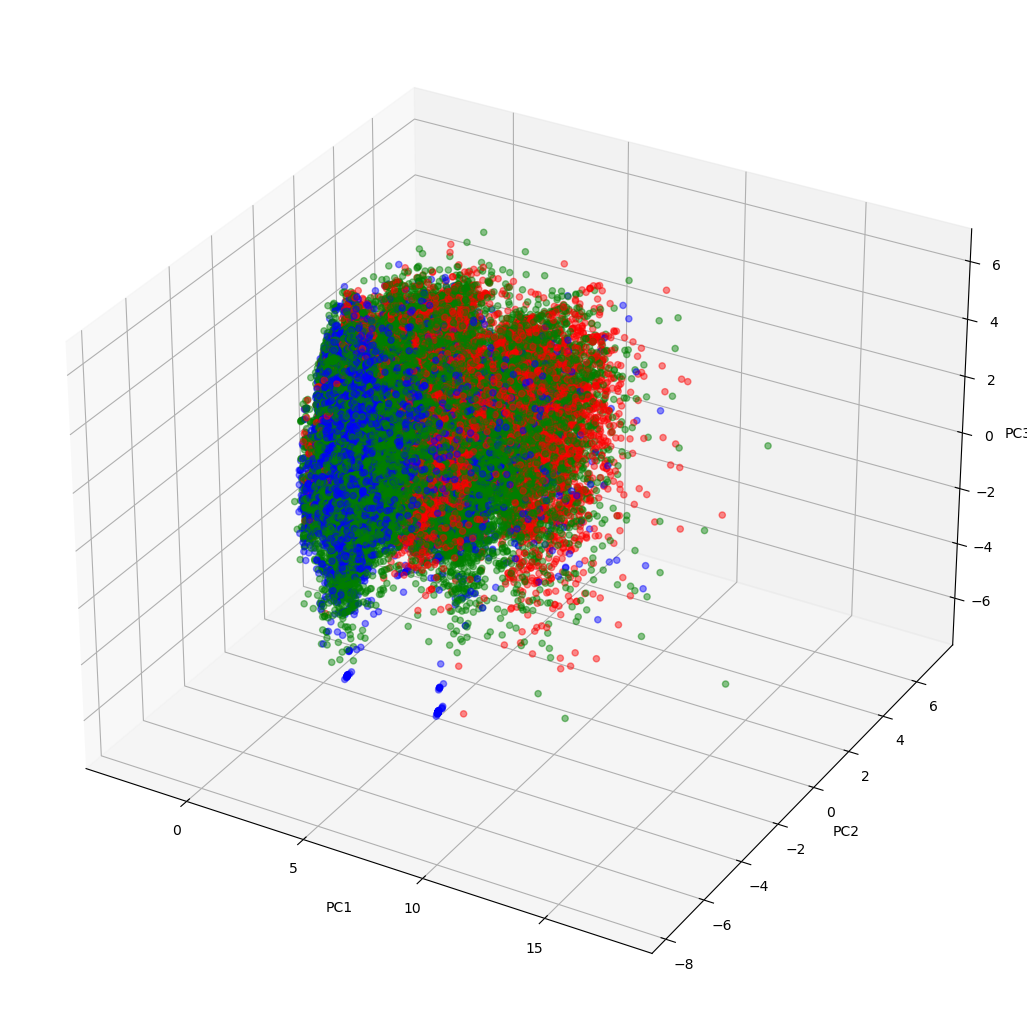

In [112]:

color_map = {
    1:"red",
    2:"green",
    3:"blue"
}

colors = train["damage_grade"].map(color_map)
fig = plt.figure()
fig = plt.figure(figsize=(13, 14))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(pc1, pc2,pc3, c=colors, marker="o", alpha=0.45)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

## Linear Regression ##

In [113]:
X = pd.read_csv("train_values.csv", index_col="building_id")
y = pd.read_csv("train_labels.csv", index_col="building_id")
X_test = pd.read_csv("test_values.csv", index_col="building_id")


In [114]:
y['damage_grade'] = y['damage_grade'].replace({1: 0, 2: 1, 3: 2})
#Encode the dataset
X = pd.get_dummies(X, dtype = int)
print(X.columns)


Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'land_surface_condition_n',
       'land

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [116]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import sklearn
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_rounded = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred_rounded)

print("Accuracy:", accuracy)

coefficients = model.coef_

intercept = model.intercept_

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)

r_squared = r2_score(y_test, y_pred)

print("Coefficients:", coefficients,"\n ","\n ","\n ","\n ","\n ","\n ","\n ")
print("Intercept:", intercept)
print("MSE: ", mse)
print("R2: ", r_squared)

Accuracy: 0.5734732641353772
Coefficients: [[ 1.21468972e-02 -7.87341019e-04  3.41416229e-03  5.57426882e-02
  -2.41511060e-03 -7.07591995e-03  1.04404613e-02  2.83890005e-02
   8.60694960e-02  4.10069480e-02 -5.22350071e-03  1.15806883e-02
  -3.97981204e-02 -3.49719039e-02 -9.05489042e-03 -1.56603958e-02
  -3.05021468e-02 -1.34009852e-02  2.06701343e-02 -2.81728198e-02
   1.43837576e-02  7.12101872e-03 -4.43440586e-03 -1.38299553e-03
   3.61923883e-03  2.29889007e-03 -6.04549087e-04 -2.63151874e-04
   1.06011709e-03 -5.02382834e-03 -5.00586849e+10 -2.56297723e+10
  -5.45632700e+10  1.71794651e+10  4.62964946e+10  8.56473111e+10
   5.31105362e+10  5.49414716e+10 -4.31647010e+10 -4.00991740e+10
  -2.27057395e+10 -4.13681691e+09 -4.57058016e+08 -3.04728211e+09
  -3.06527281e+09 -6.48954740e+08 -5.57470129e+10 -7.45549570e+10
  -3.24483696e+10 -5.76849333e+10  1.48884516e+11  6.36213593e+10
   2.82276743e+11  2.50819173e+11 -3.89462372e+09 -4.41665330e+09
  -2.43575518e+10 -1.11931756e+09

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2595 43305 6221


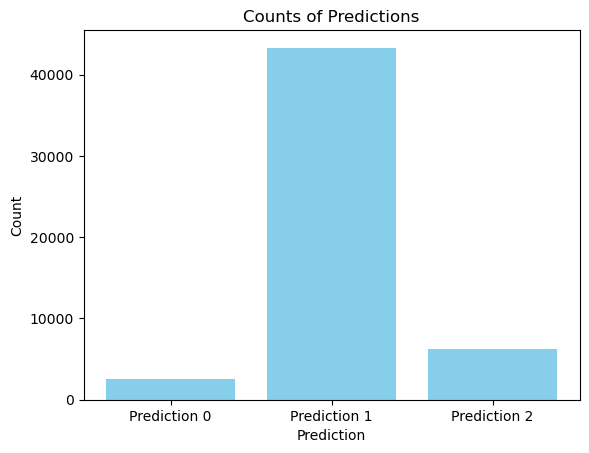

27873.5

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.01, 0.1, 1,5, 10], 'penalty':['l2']}
log_reg = LogisticRegression(class_weight='none')
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=0, n_jobs='none')

logmodel = LogisticRegression(class_weight=None)
p = logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)
print(sum(predictions == 0)
,sum(predictions == 1)
,sum(predictions == 2))

import matplotlib.pyplot as plt

# Values
values = [sum(predictions == 0), sum(predictions == 1), sum(predictions == 2)]
labels = ['Prediction 0', 'Prediction 1', 'Prediction 2']

# Create a bar plot
plt.bar(labels, values, color='skyblue')

# Add labels and title
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Counts of Predictions')

# Show plot
plt.show()

sum (predictions)/2

In [119]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[ 1459  3505   124]
 [ 1042 25827  2681]
 [   94 13973  3416]]


## Naive Baiyes ##

In [120]:
X = pd.read_csv("train_values.csv", index_col="building_id")
y = pd.read_csv("train_labels.csv", index_col="building_id")
X_test = pd.read_csv("test_values.csv", index_col="building_id")

In [121]:
y['damage_grade'] = y['damage_grade'].replace({1: 0, 2: 1, 3: 2})
#Encode the dataset
X = pd.get_dummies(X, dtype = int)
print(X.columns)

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'land_surface_condition_n',
       'land

In [122]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y , test_size=0.2, random_state=40)


In [123]:
class GaussianNBClassifier(object):
    def __init__(self):
        pass

    def fit(self, X, y):
        separated = [[x for x, t in zip(X, y) if t == c] for c in np.unique(y)]
        self.model = np.array([np.c_[np.mean(i, axis=0), np.std(i, axis=0)] for i in separated])
        return self

    def _prob(self, x, mean, std):
        exponent = np.exp(- ((x - mean)**2 / (2 * std**2)))
        return np.log(exponent / (np.sqrt(2 * np.pi) * std))

    def predict_log_proba(self, X):
        return [[sum(self._prob(i, *s) for s, i in zip(summaries, x))
                for summaries in self.model] for x in X]

    def predict(self, X):
        return np.argmax(self.predict_log_proba(X), axis=1)

    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)

In [124]:
gnb = GaussianNBClassifier()
gnb.fit(X_train.to_numpy()[:,:7], y_train["damage_grade"])
y_pred_GNB = gnb.predict(X_valid.to_numpy()[:,:7])

acc_GNB = accuracy_score(y_valid, y_pred_GNB)
print(acc_GNB)
print(confusion_matrix(y_valid, y_pred_GNB))

0.38990042401335356
[[ 2337   708  1937]
 [ 5382  4895 19368]
 [ 2468  1936 13090]]


In [125]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.iloc[:,:7], y_train)
y_pred_GNB = gnb.predict(X_valid.iloc[:,:7])

print("Accuracy Gauss Naive Baiyes :", accuracy_score(y_valid, y_pred_GNB))
print(classification_report(y_valid, y_pred_GNB))
print(confusion_matrix(y_valid, y_pred_GNB))

Accuracy Gauss Naive Baiyes : 0.5637458989658679
              precision    recall  f1-score   support

           0       0.28      0.11      0.16      4982
           1       0.57      0.95      0.72     29645
           2       0.57      0.04      0.07     17494

    accuracy                           0.56     52121
   macro avg       0.48      0.37      0.32     52121
weighted avg       0.55      0.56      0.45     52121

[[  567  4369    46]
 [ 1042 28134   469]
 [  386 16426   682]]


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [126]:
class BernoulliNB(object):
    def __init__(self, alpha=1.0):
        self.alpha = alpha

    def fit(self, X, y):
        count_sample = X.shape[0]
        separated = [[x for x, t in zip(X, y) if t == c] for c in np.unique(y)]
        self.class_log_prior_ = [np.log(len(i) / count_sample) for i in separated]
        count = np.array([np.array(i).sum(axis=0) for i in separated]) + self.alpha
        smoothing = 2 * self.alpha
        n_doc = np.array([len(i) + smoothing for i in separated])
        self.feature_prob_ = count / n_doc[np.newaxis].T
        return self

    def predict_log_proba(self, X):
        return [(np.log(self.feature_prob_) * x + np.log(1 - self.feature_prob_) * np.abs(x - 1)
                ).sum(axis=1) + self.class_log_prior_ for x in X]

    def predict(self, X):
        return np.argmax(self.predict_log_proba(X), axis=1)

In [127]:

mnb = BernoulliNB()
mnb.fit(X_train.to_numpy()[:,10:], y_train["damage_grade"])
y_pred_MNB = mnb.predict(X_valid.to_numpy()[:,10:])
acc_MNB = accuracy_score(y_valid, y_pred_MNB)
print(acc_MNB)
print(precision_score(y_valid, y_pred_MNB, average="weighted"))
print(classification_report(y_valid, y_pred_MNB))

print(confusion_matrix(y_valid, y_pred_MNB))

/var/folders/r5/97p5_1zs7w7gdlq9bjgm3wd80000gn/T/ipykernel_89107/483067321.py:16: RuntimeWarning: invalid value encountered in log
  return [(np.log(self.feature_prob_) * x + np.log(1 - self.feature_prob_) * np.abs(x - 1)


0.3356420636595614
0.11265559489764906
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4982
           1       0.00      0.00      0.00     29645
           2       0.34      1.00      0.50     17494

    accuracy                           0.34     52121
   macro avg       0.11      0.33      0.17     52121
weighted avg       0.11      0.34      0.17     52121

[[    0     0  4982]
 [    0     0 29645]
 [    0     0 17494]]


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11

In [128]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train.iloc[:,7:],  y_train)
y_pred_BNB= bnb.predict(X_valid.iloc[:,7:])

print("Accuracy Bernoulli Naive Baiyes :", accuracy_score(y_valid, y_pred_BNB))
print(classification_report(y_valid, y_pred_BNB))

print(confusion_matrix(y_valid, y_pred_BNB))

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Bernoulli Naive Baiyes : 0.4947334087987567
              precision    recall  f1-score   support

           0       0.44      0.55      0.48      4982
           1       0.62      0.39      0.48     29645
           2       0.42      0.65      0.51     17494

    accuracy                           0.49     52121
   macro avg       0.49      0.53      0.49     52121
weighted avg       0.54      0.49      0.49     52121

[[ 2717  1292   973]
 [ 3164 11622 14859]
 [  363  5684 11447]]


In [129]:
probs = (gnb.predict_proba(X_valid.iloc[:,:7])* bnb.predict_proba(X_valid.iloc[:,7:]))
probs = np.divide(probs, np.sum(probs, axis=1)[:,np.newaxis])
y_pred = np.argmax(probs, axis=1)
print("Accuracy Mixed Naive Baiyes :", accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))
print(confusion_matrix(y_valid, y_pred))


Accuracy Mixed Naive Baiyes : 0.5604650716601753
              precision    recall  f1-score   support

           0       0.43      0.49      0.46      4982
           1       0.62      0.67      0.64     29645
           2       0.48      0.40      0.44     17494

    accuracy                           0.56     52121
   macro avg       0.51      0.52      0.51     52121
weighted avg       0.56      0.56      0.56     52121

[[ 2423  2169   390]
 [ 2797 19760  7088]
 [  374 10091  7029]]


## Multinomial Logistic Regression ##

Áp dụng hồi quy logistic đa biến

In [172]:
data = pd.read_csv(data_path)
label = pd.read_csv(labels_path)

In [173]:
data_df = data.drop(['building_id'], axis=1)
train_labels = label.drop(['building_id'], axis=1)

In [191]:
from sklearn.preprocessing import LabelEncoder

# List các biến phân loại cần chuyển đổi
categorical_variables = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 
                         'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']

# Label encoding cho các biến phân loại
label_encoder = LabelEncoder()
for variable in categorical_variables:
    data_df[variable] = label_encoder.fit_transform(data_df[variable])
    
scaler = StandardScaler()
data_df = scaler.fit_transform(data_df)

In [193]:
X_train, X_test, y_train, y_test = train_test_split(data_df, train_labels.values.flatten(), random_state=42, test_size=0.2)

In [194]:
X_train.shape

(208480, 38)

In [195]:
from scipy import sparse
def convert_labels(y, C):
    """
    convert 1d label to a matrix label: each column of this
    matrix coresponding to 1 element in y. In i-th column of Y,
    only one non-zeros element located in the y[i]-th position,
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return

        [[1, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0]]
    """
    print('y',y.shape, C)
    Y = sparse.coo_matrix((np.ones_like(y),
    (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

In [196]:
def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in Z.
    each column of Z is a set of score.
    """
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

In [197]:
def softmax(Z):
    """
    #Compute softmax values for each sets of scores in V.
    #each column of V is a set of score.
    """
    # Subtract the maximum value for numerical stability
    Z -= np.max(Z, axis=0)
    # Exponentiate the adjusted input array
    e_Z = np.exp(Z)
    # Calculate the softmax probabilities
    A = e_Z / e_Z.sum(axis=0)
    return A

In [198]:
# cost or loss function
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

In [199]:
def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000):
    from sklearn.metrics import log_loss
    losses = []
    W = [W_init]
    C = W_init.shape[1]
    print(sum([1 for i in y if i > 2]))
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]

    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            # print(ai)
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)

    return W

# W[-1] is the solution, W is all history of weights

In [200]:
# Predict that X belong to which class (1..C now indexed as 0..C-1 )
def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax_stable(W.T.dot(X.T))
    return np.argmax(A, axis = 0)

In [201]:
eta = .05
C = 3
d = X_train.shape[1]
d

38

In [202]:
W_init = np.random.randn(X_train.shape[1], 3)
# print(X_train.T)
# print(y_train.shape)
# print(W_init.shape)
y_train = y_train - 1
W = softmax_regression(X_train.T, y_train, W_init, eta)[-1]

0
y (208480,) 3


In [203]:
W.shape

(38, 3)

In [204]:
y_pred = pred(W, X_test)

In [205]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred + 1)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       0.26      0.56      0.35      5170
           2       0.58      0.43      0.49     29487
           3       0.40      0.44      0.42     17464

    accuracy                           0.44     52121
   macro avg       0.41      0.47      0.42     52121
weighted avg       0.49      0.44      0.45     52121



Code thư viện


In [206]:
from sklearn.linear_model import LogisticRegression

# Create logistic regression model
logistic_regression = LogisticRegression(multi_class='multinomial')

logistic_regression.fit(X_train, y_train)



LogisticRegression(multi_class='multinomial')

In [207]:
from sklearn.metrics import classification_report

# Predict labels for the test set
y_pred_test = logistic_regression.predict(X_test)

# Calculate evaluation metrics
report = classification_report(y_test, y_pred_test + 1)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       0.59      0.26      0.36      5170
           2       0.59      0.91      0.71     29487
           3       0.53      0.12      0.20     17464

    accuracy                           0.58     52121
   macro avg       0.57      0.43      0.42     52121
weighted avg       0.57      0.58      0.51     52121

